<a href="https://colab.research.google.com/github/DatNT146/Dat/blob/main/Ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Khai báo các thư viện
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing


In [ ]:
#Truy cập vào gg drive
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Truy cập vào tập dữ liệu 
training_set=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/Training_set',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 170 images belonging to 3 classes.


In [ ]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/Test_set',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 45 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'Dat': 0, 'Dung': 1, 'Duy': 2}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,1500,3))) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_37 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [ ]:
opt=SGD(lr=0.01,momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=150,batch_size=10,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)]) # verbose=1 để hiển thị quá trinh học

Epoch 1/150
6/6 [==============================] - 3s 476ms/step - loss: 12.4643 - accuracy: 0.3059 - val_loss: 0.8347 - val_accuracy: 0.6444
Epoch 2/150
6/6 [==============================] - 2s 359ms/step - loss: 0.9141 - accuracy: 0.5059 - val_loss: 0.6977 - val_accuracy: 0.6667
Epoch 3/150
6/6 [==============================] - 2s 341ms/step - loss: 0.4274 - accuracy: 0.8824 - val_loss: 0.3241 - val_accuracy: 0.8000
Epoch 4/150
6/6 [==============================] - 2s 345ms/step - loss: 0.0818 - accuracy: 0.9765 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 5/150
6/6 [==============================] - 3s 409ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.9949e-04 - val_accuracy: 1.0000
Epoch 6/150
6/6 [==============================] - 2s 364ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 4.2144e-05 - val_accuracy: 1.0000
Epoch 7/150
6/6 [==============================] - 2s 361ms/step - loss: 5.4931e-04 - accuracy: 1.0000 - val_loss: 4.6967e-06 - val_accuracy: 1.0

In [ ]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 4.114748662686907e-05
Train Accuracy 1.0


<function matplotlib.pyplot.show>

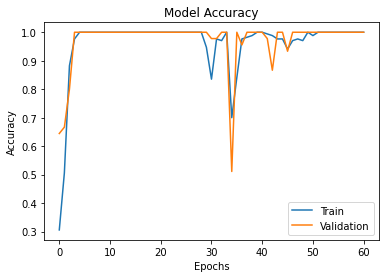

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("Save.h5")
model_CNN=load_model('Save.h5')

Dat


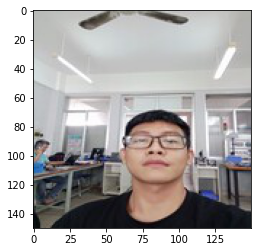

In [ ]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/CNN/Predict/dat3.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Dat'
elif round(result[0][1])==1:
  prediction='Dung'
elif round(result[0][2])==1:
  prediction='Duy'
  
print(prediction)

Duy


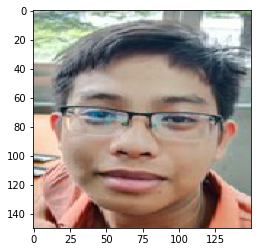

In [ ]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/CNN/Predict/duy1.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Dat'
elif round(result[0][1])==1:
  prediction='Dung'
elif round(result[0][2])==1:
  prediction='Duy'
  
print(prediction)

Dung


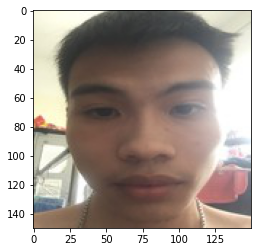

In [ ]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/CNN/Predict/dung2.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Dat'
elif round(result[0][1])==1:
  prediction='Dung'
elif round(result[0][2])==1:
  prediction='Duy'
  
print(prediction)